# Starter Code

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [62]:
dataset = pd.read_csv('Training data file.csv')

In [63]:
dataset.head()

,Customer_No,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
0,1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,...,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
1,2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,...,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
2,3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,...,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
3,4,0,43551,76,NaN,0,NaN,0.0,NaN,No,...,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
4,5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,...,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


# EDA

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81253 entries, 0 to 81252
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_No               81253 non-null  int64  
 1   N_Default_L3m             81253 non-null  int64  
 2   Branch_Code               81253 non-null  int64  
 3   Max_Utilization           81253 non-null  int64  
 4   Max_Perc_Def_Chg_Pending  60175 non-null  float64
 5   N_Family_Member           81253 non-null  int64  
 6   Max_Ratio_OC_Pending_POS  8607 non-null   float64
 7   N_PosBkt_L3m              75915 non-null  float64
 8   CoAp_Income               4118 non-null   float64
 9   Ever_Default_L12M         81253 non-null  object 
 10  Perc_Paymode_Online       81253 non-null  float64
 11  Perc_Repay_Fail           81253 non-null  float64
 12  Birth_Year                81253 non-null  int64  
 13  Max_DPD_L3m               81010 non-null  float64
 14  Perc_P

In [65]:
mapping = {'No': 0, 'Yes': 1}
dataset['Ever_Default_L12M'] = dataset['Ever_Default_L12M'].replace(mapping)

In [66]:
dataset.describe()

,Customer_No,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
count,81253.000000,81253.000000,81253.000000,81253.000000,60175.000000,81253.000000,8607.000000,75915.000000,4118.000000,81253.000000,...,81253.000000,81010.000000,57776.000000,81253.000000,26541.000000,30948.000000,81253.000000,8.091200e+04,81253.000000,81253.000000
mean,40627.000000,1.463244,38601.512092,72.799897,85.887877,2.997403,0.127985,0.013225,66705.865712,0.792143,...,1989.649822,10.485681,0.589924,33.350178,0.431672,1.420512,0.851082,1.462583e+05,8.306487,0.120414
std,23455.865048,1.192534,18208.708541,20.463910,30.382934,4.908966,0.167004,0.122583,10062.391979,0.405776,...,8.946473,9.751303,0.200213,8.946473,0.739288,0.896337,1.773618,4.509210e+05,8.583735,0.325447
min,1.000000,0.000000,7002.000000,17.000000,0.000000,-5.000000,0.000000,0.000000,10000.000000,0.000000,...,1956.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,-5.425000e+03,-7.000000,0.000000
25%,20314.000000,0.000000,22926.000000,52.000000,99.000000,-1.000000,0.045886,0.000000,67661.000000,1.000000,...,1984.000000,0.000000,0.500000,26.000000,0.000000,1.000000,0.000000,9.992000e+03,3.000000,0.000000
50%,40627.000000,1.000000,38625.000000,76.000000,100.000000,3.000000,0.080090,0.000000,68425.000000,1.000000,...,1992.000000,9.000000,0.500000,31.000000,0.000000,1.000000,0.000000,1.999900e+04,7.000000,0.000000
75%,60940.000000,3.000000,54369.000000,88.000000,100.000000,7.000000,0.148235,0.000000,69214.000000,1.000000,...,1997.000000,18.000000,0.666667,39.000000,1.000000,2.000000,1.000000,1.100060e+05,13.000000,0.000000
max,81253.000000,3.000000,70000.000000,100.000000,100.000000,11.000000,4.976905,3.000000,70000.000000,1.000000,...,2002.000000,29.000000,1.000000,67.000000,9.000000,3.000000,33.000000,6.553632e+07,43.000000,1.000000


In [67]:
dataset.columns #total = 22

Index(['Customer_No', 'N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

In [68]:
missing_values_count = dataset.isnull().sum()
correlation_with_target = dataset.corr()['Target_Flag']
result_df = pd.concat([missing_values_count, correlation_with_target], axis=1)
result_df.columns = ['Missing_Values_Count', 'Correlation_with_Target']
print(result_df)

                          Missing_Values_Count  Correlation_with_Target
Customer_No                                  0                 0.025576
N_Default_L3m                                0                 0.080947
Branch_Code                                  0                 0.000507
Max_Utilization                              0                 0.008800
Max_Perc_Def_Chg_Pending                 21078                 0.035042
N_Family_Member                              0                 0.002653
Max_Ratio_OC_Pending_POS                 72646                 0.006425
N_PosBkt_L3m                              5338                 0.066022
CoAp_Income                              77135                 0.014117
Ever_Default_L12M                            0                 0.080491
Perc_Paymode_Online                          0                 0.094418
Perc_Repay_Fail                              0                 0.099535
Birth_Year                                   0                 0

In [69]:
df = dataset.dropna() #no missing values

In [70]:
dataset.duplicated().sum()

0

# Visuals

<Axes: >

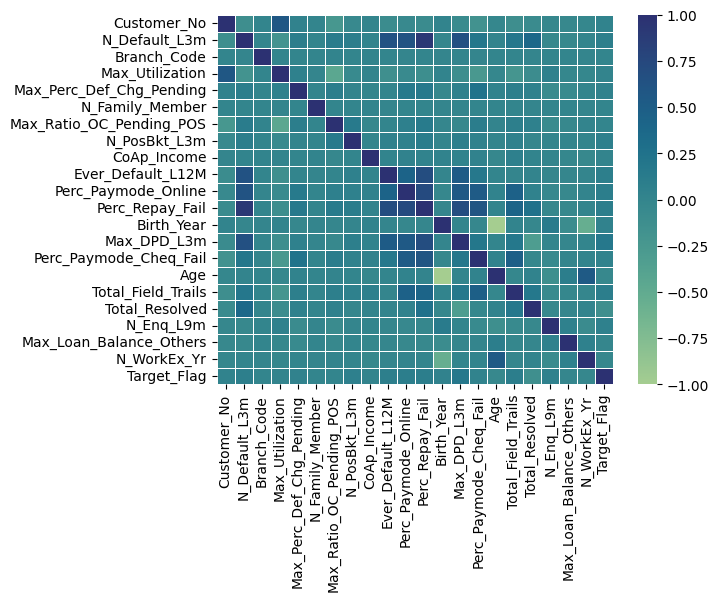

In [71]:
sns.heatmap(dataset.corr(), cmap = 'crest', linewidth=.5)


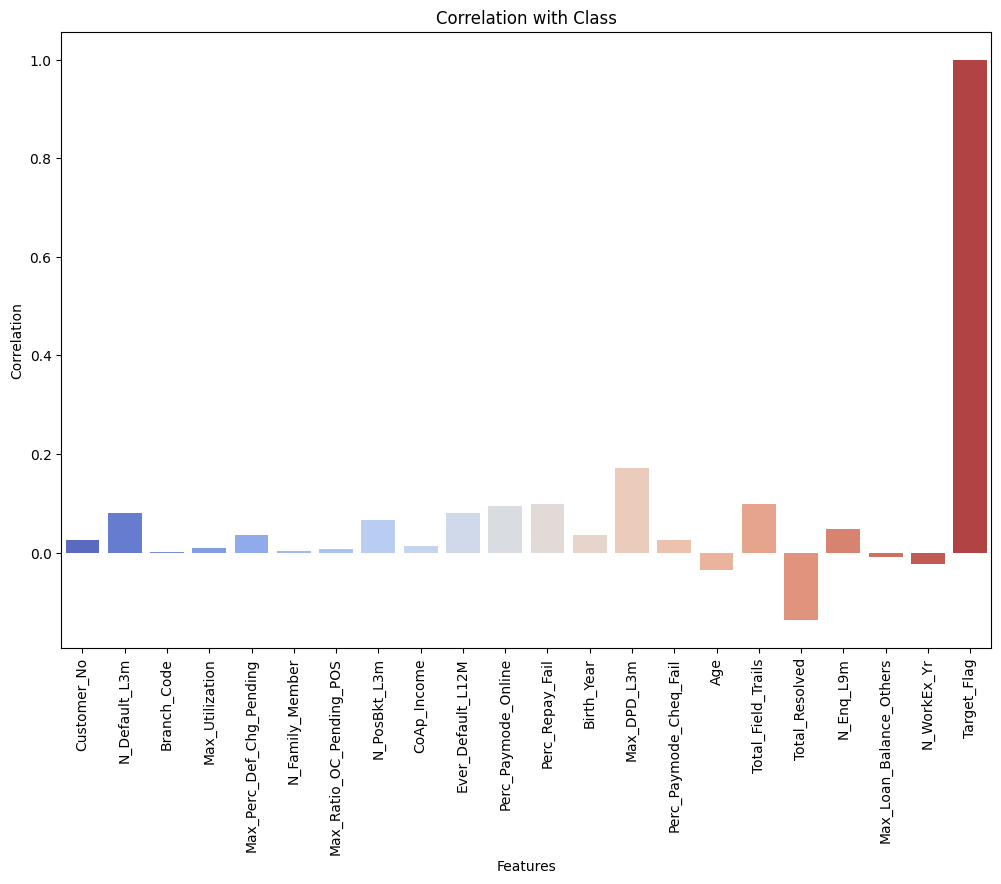

In [72]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Target_Flag'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [73]:
dataset['Target_Flag'].value_counts()

0    71469
1     9784
Name: Target_Flag, dtype: int64

<Axes: ylabel='Target_Flag'>

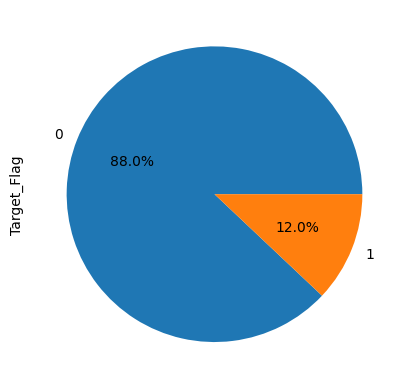

In [74]:
dataset['Target_Flag'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

# OverSampling Dataset

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [76]:
data = dataset

data.fillna(data.mean(), inplace=True)

X = data.drop('Target_Flag', axis=1)
y = data['Target_Flag']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [77]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train_resampled)

# Apply the same imputer to your validation data
X_val_imputed = imputer.transform(X_val)

## Values after resampling

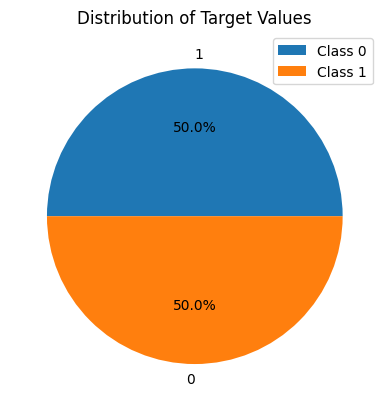

In [78]:
total = pd.Series(y_train_resampled)
total.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Target Values')
plt.legend(labels=['Class 0', 'Class 1'], loc='upper right')
plt.show()

In [79]:
total.value_counts()

1    57191
0    57191
Name: Target_Flag, dtype: int64

# Training

## Random Forest

acc: 87%

In [80]:
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train_imputed, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=0)

## Model predictions

In [81]:
threshold = 0.5

In [82]:
y_pred_binary = (model.predict_proba(X_val_imputed)[:, 1] > threshold).astype(int)
y_pred_proba = model.predict_proba(X_val_imputed)[:, 1]

In [83]:
y_pred_proba

array([0.135, 0.285, 0.015, ..., 0.33 , 0.3  , 0.145])

## Tests

In [84]:
auc_roc = roc_auc_score(y_val, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

accuracy = accuracy_score(y_val, y_pred_binary)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_val, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_val, y_pred_binary)
print("Classification Report:")
print(class_report)

AUC-ROC Score: 0.6804222709051535
Accuracy: 0.8724386191618977
Confusion Matrix:
[[14065   213]
 [ 1860   113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14278
           1       0.35      0.06      0.10      1973

    accuracy                           0.87     16251
   macro avg       0.61      0.52      0.51     16251
weighted avg       0.82      0.87      0.83     16251



### Predictions

In [85]:
results_df = pd.DataFrame({'Customer_No': X_val['Customer_No'], 'Prediction': y_pred_binary, 'Probability_Prediction': y_pred_proba})

In [86]:
results_df

,Customer_No,Prediction,Probability_Prediction
1591,1592,0,0.135
27091,27092,0,0.285
79619,79620,0,0.015
36258,36259,0,0.230
70110,70111,0,0.165
...,...,...,...
61160,61161,0,0.175
7920,7921,0,0.205
18709,18710,0,0.330
78968,78969,0,0.300


# Predictions for Validation

In [87]:
validation_data = pd.read_csv('Validation Data file.csv')

In [88]:
#Preprocess
validation_data['Ever_Default_L12M'] = dataset['Ever_Default_L12M'].replace(mapping)
validation_data.fillna(data.mean(), inplace=True)

In [89]:
y_val_pred_binary = model.predict(validation_data)
y_val_pred_proba = model.predict_proba(validation_data)[:, 1]

In [90]:
# Create a DataFrame with 'Customer_No', 'Prediction', and 'Probability_Prediction'
result_df = pd.DataFrame({
    'Customer_No': validation_data['Customer_No'],
    'Prediction': y_val_pred_binary,
    'Probability_Prediction': y_val_pred_proba
})
result_df['Probability_Prediction'] = result_df['Probability_Prediction'].round(2)


In [91]:
result_df

,Customer_No,Prediction,Probability_Prediction
0,90000,0,0.39
1,90001,0,0.26
2,90002,0,0.07
3,90003,0,0.15
4,90004,0,0.26
...,...,...,...
30056,120056,1,0.55
30057,120057,0,0.18
30058,120058,0,0.18
30059,120059,0,0.23


In [92]:
# Save the DataFrame as a CSV file
result_df.to_csv('validation_predictions.csv', index=False)

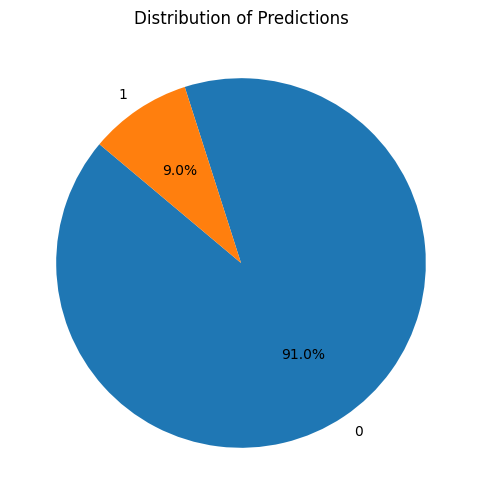

In [93]:
prediction_counts = result_df['Prediction'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predictions')
plt.show()